# **Image Processing**

**Step 1: Install OpenCV**

In [ ]:
!pip install opencv-python-headless

**Step 2: Import Necessary Libraries**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [48]:
# Function to display an image using matplotlib
def display_image(img, title="Image"):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Function to display two images side by side
def display_images(img1, img2, title1="Image 1", title2="Image 2"):
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    plt.title(title1)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    plt.title(title2)
    plt.axis('off')

    plt.show()

**Step 3: Load an Image**

Saving johnny.jpeg to johnny (4).jpeg


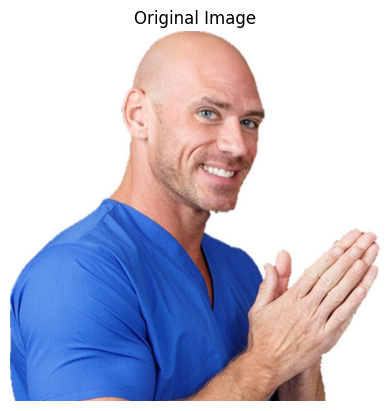

In [78]:
from google.colab import files
from io import BytesIO
from PIL import Image

# Upload an image
uploaded = files.upload()
# Convert to OpenCV format
image_path = next(iter(uploaded)) # Get the image file name
image = Image.open(BytesIO(uploaded[image_path]))
image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
display_image(image, "Original Image")

**Exercise 1: Scaling and Rotation**

In [50]:
# Scaling
def scale_image(img, scale_factor):
    height, width = img.shape[:2]
    scaled_img = cv2.resize(img,
(int(width * scale_factor), int(height * scale_factor)), interpolation=cv2.INTER_LINEAR)
    return scaled_img


# Rotate
def rotate_image(img, angle):
    height, width = img.shape[:2]
    center = (width // 2, height // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_img = cv2.warpAffine(img, matrix, (width, height))
    return rotated_img

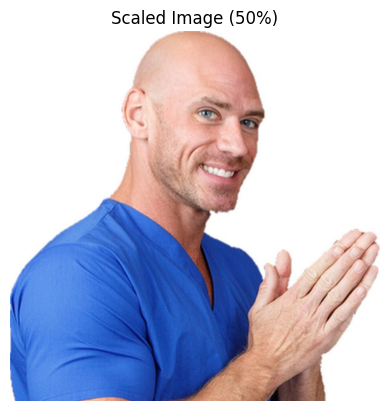

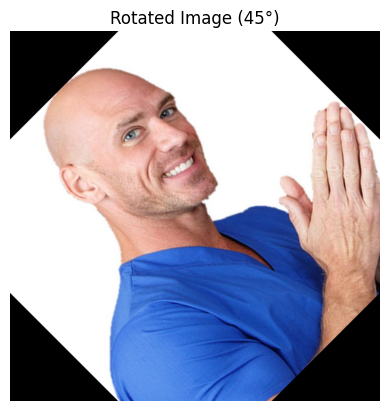

In [51]:
# Scale image by 0.5
scaled_image = scale_image(image, 0.5)
display_image(scaled_image, "Scaled Image (50%)")

# Rotate image by 45 degrees
rotated_image = rotate_image(image, 45)
display_image(rotated_image, "Rotated Image (45°)")

**Exercise 2: Blurring Techniques**

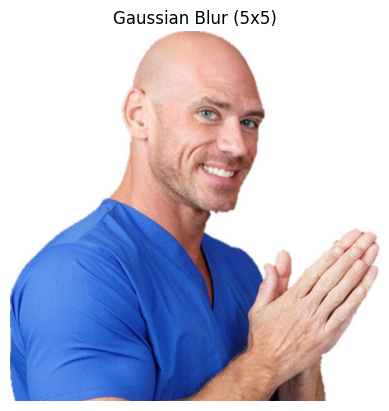

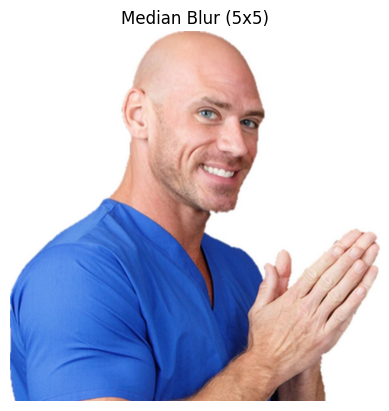

In [52]:
# Gaussian Blur
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)
display_image(gaussian_blur, "Gaussian Blur (5x5)")

# Median Blur
median_blur = cv2.medianBlur(image, 5)
display_image(median_blur, "Median Blur (5x5)")

**Exercise 3: Edge Detection using Canny**

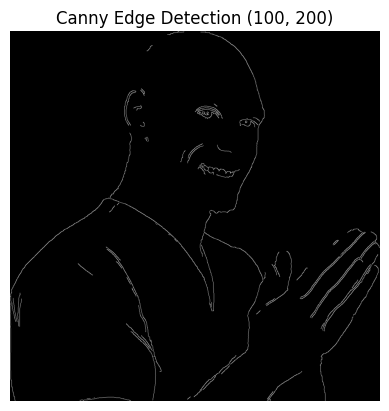

In [53]:
# Canny Edge Detection
edges = cv2.Canny(image, 100, 200)
display_image(edges, "Canny Edge Detection (100, 200)")

**Exercise 4: Basic Image Processor (Interactive)**

Enter action (scale, rotate, gaussian_blur, median_blur, canny): canny


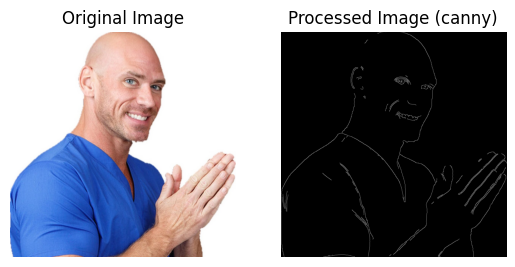

In [ ]:
def process_image(img, action):
  if action == 'scale':
    return scale_image(img, 0.5)
  elif action == 'rotate':
    return rotate_image(img, 45)
  elif action == 'gaussian_blur':
    return cv2.GaussianBlur(img, (5, 5), 0)
  elif action == 'median_blur':
    return cv2.medianBlur(img, 5)
  elif action == 'canny':
    return cv2.Canny(img, 100, 200)
  else:
    return img

action = input("Enter action (scale, rotate, gaussian_blur, median_blur, canny): ")
processed_image = process_image(image, action)
display_images(image, processed_image, "Original Image", f"Processed Image ({action})")

**Exercise 5: Comparison of Filtering Techniques**

In [54]:
# Applying Gaussian, Median, and Bilateral filters
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)
median_blur = cv2.medianBlur(image, 5)
bilateral_filter = cv2.bilateralFilter(image, 9, 75, 75)

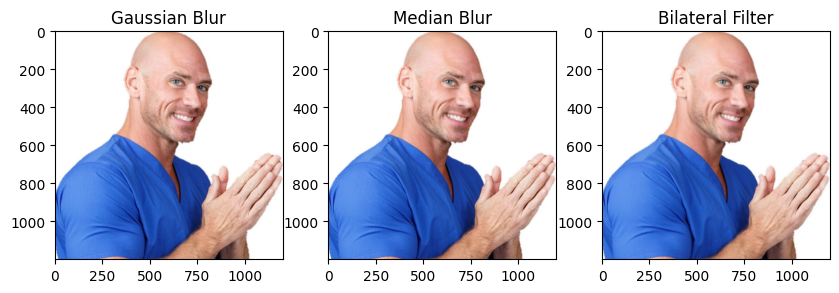

In [55]:
# Display the results for comparison
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blur")

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(median_blur, cv2.COLOR_BGR2RGB))
plt.title("Median Blur")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(bilateral_filter, cv2.COLOR_BGR2RGB))
plt.title("Bilateral Filter")

plt.show()

**Sobel Edge Detection**

In [66]:
# Sobel Edge Detection
def sobel_edge_detection(img):
    grad_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    grad = np.sqrt(grad_x**2 + grad_y**2)
    return cv2.convertScaleAbs(grad)

**Apply Sobel edge detection to the uploaded image**

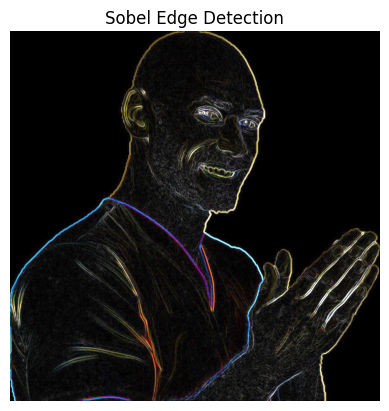

In [67]:
sobel_edges = sobel_edge_detection(image)
plt.imshow(sobel_edges, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis('off')
plt.show()

**Prewitt Edge Detection**

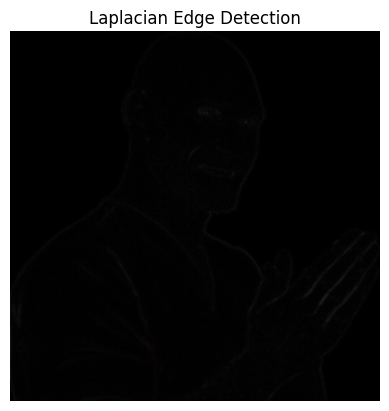

In [68]:
# Laplacian Edge Detection
def laplacian_edge_detection(img):
    laplacian = cv2.Laplacian(img, cv2.CV_64F)
    return cv2.convertScaleAbs(laplacian)

# Apply Laplacian edge detection to the uploaded image
laplacian_edges = laplacian_edge_detection(image)
plt.imshow(laplacian_edges, cmap='gray')
plt.title("Laplacian Edge Detection")
plt.axis('off')
plt.show()

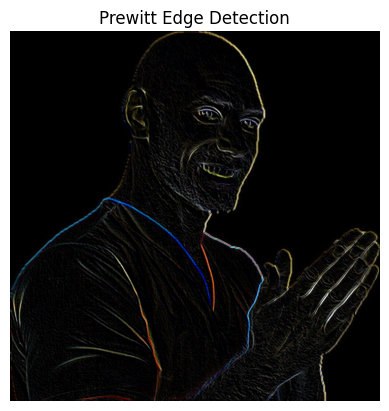

In [71]:
# Prewitt Edge Detection
def prewitt_edge_detection(img):
    # Define Prewitt kernels
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    # Apply the kernels to the image
    img_prewittx = cv2.filter2D(img, -1, kernelx)
    img_prewitty = cv2.filter2D(img, -1, kernely)
    # Combine the horizontal and vertical edges
    img_prewitt = img_prewittx + img_prewitty
    return img_prewitt

# Apply Prewitt edge detection to the uploaded image
prewitt_edges = prewitt_edge_detection(image)
plt.imshow(prewitt_edges, cmap='gray')
plt.title("Prewitt Edge Detection")
plt.axis('off')
plt.show()


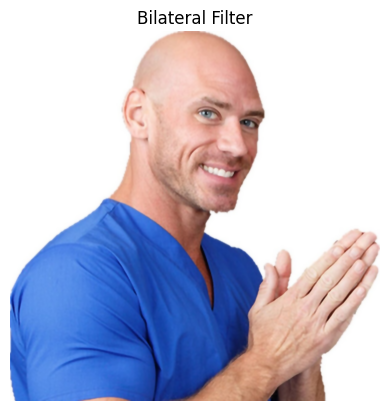

In [72]:
# Bilateral Filter
def bilateral_blur(img):
    bilateral = cv2.bilateralFilter(img, 9, 75, 75)
    return bilateral

# Apply Bilateral filter to the uploaded image
bilateral_blurred = bilateral_blur(image)
plt.imshow(cv2.cvtColor(bilateral_blurred, cv2.COLOR_BGR2RGB))
plt.title("Bilateral Filter")
plt.axis('off')
plt.show()

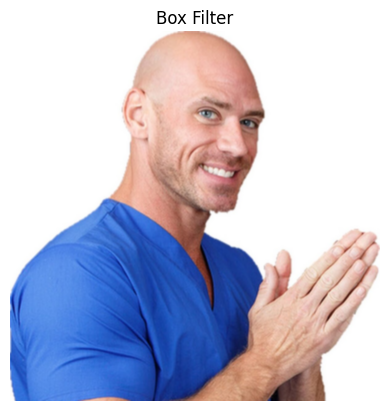

In [73]:
# Box Filter
def box_blur(img):
    box = cv2.boxFilter(img, -1, (5, 5))
    return box
# Apply Box filter to the uploaded image
box_blurred = box_blur(image)
plt.imshow(cv2.cvtColor(box_blurred, cv2.COLOR_BGR2RGB))
plt.title("Box Filter")
plt.axis('off')
plt.show()

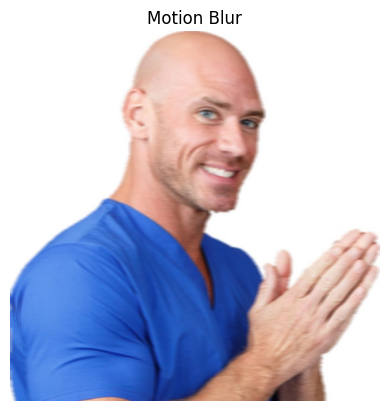

In [74]:
# Motion Blur
def motion_blur(img):
    # Create motion blur kernel (size 15x15)
    kernel_size = 15
    kernel = np.zeros((kernel_size, kernel_size))
    kernel[int((kernel_size - 1) / 2), :] = np.ones(kernel_size)
    kernel = kernel / kernel_size
    # Apply motion blur
    motion_blurred = cv2.filter2D(img, -1, kernel)
    return motion_blurred

# Apply Motion blur to the uploaded image
motion_blurred = motion_blur(image)
plt.imshow(cv2.cvtColor(motion_blurred, cv2.COLOR_BGR2RGB))
plt.title("Motion Blur")
plt.axis('off')
plt.show()

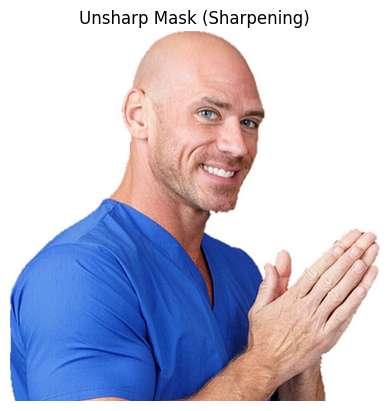

In [75]:
# Unsharp Masking (Sharpening)
def unsharp_mask(img):
    # Create a Gaussian blur version of the image
    blurred = cv2.GaussianBlur(img, (9, 9), 10.0)
    # Sharpen by adding the difference between the original and the blurred image
    sharpened = cv2.addWeighted(img, 1.5, blurred, -0.5, 0)
    return sharpened


# Apply Unsharp Masking to the uploaded image
sharpened_image = unsharp_mask(image)
plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
plt.title("Unsharp Mask (Sharpening)")
plt.axis('off')
plt.show()

Enter action (scale, rotate, gaussian_blur, median_blur, canny, sobel, laplacian, prewitt, bilateral_blur, box_blur, motion_blur, unsharp_mask): canny


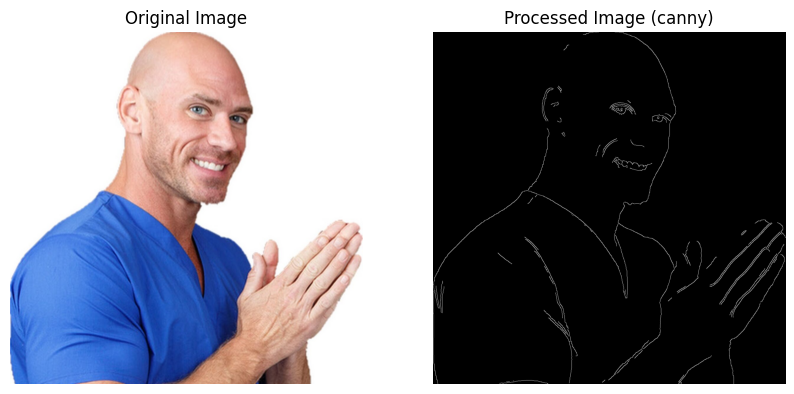

In [83]:
# Update process_image function to include new blurring techniques
def process_image(img, action):
    if action == 'scale':
        return scale_image(img, 0.5)
    elif action == 'rotate':
        return rotate_image(img, 45)
    elif action == 'gaussian_blur':
        return cv2.GaussianBlur(img, (5, 5), 0)
    elif action == 'median_blur':
        return cv2.medianBlur(img, 5)
    elif action == 'canny':
        return cv2.Canny(img, 100, 200)
    elif action == 'sobel':
        return sobel_edge_detection(img)
    elif action == 'laplacian':
        return laplacian_edge_detection(img)
    elif action == 'prewitt':
        return prewitt_edge_detection(img)
    elif action == 'bilateral_blur':
        return bilateral_blur(img)
    elif action == 'box_blur':
        return box_blur(img)
    elif action == 'motion_blur':
        return motion_blur(img)
    elif action == 'unsharp_mask':
        return unsharp_mask(img)
    else:
        return img


# Update display_images function to handle single channel images
def display_images(img1, img2, title1, title2):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    plt.title(title1)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    if len(img2.shape) == 2:  # Check if the image is grayscale
        plt.imshow(img2, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    plt.title(title2)
    plt.axis('off')

    plt.show()

# Add new blurring options for interactive processing
action = input("Enter action (scale, rotate, gaussian_blur, median_blur, canny, sobel, laplacian, prewitt, bilateral_blur, box_blur, motion_blur, unsharp_mask): ")
processed_image = process_image(image, action)
display_images(image, processed_image, "Original Image", f"Processed Image ({action})")